# Bank Churn Prediction

### Name: Chenyu Wang
### Data Source :https://www.kaggle.com/hj5992/bank-churn-modelling

# Conclusion
## EDA Part
- Both young and old people have low probability to churn. People in middle age and are wealthy are more likely to churn.
- People with credit score lower than 410 have a significantly higher chance to churn than others.
- Zero balance is missing value. Reason 1: It's impossible that Germany has no customers have zero balance in bank while lots of customers in another two countries have zero balance. Reason 2: Almost all customers have the same distributions whether balance is 0. Reason 3: The correlation matrixs under two conditions are almost the same. I guess that maybe the data team in the bank lose some data both from Spain or France and have two products.
- Other parameters have no ability to do prediction to fill in the missing value.
- Tenure, Estimated Salary, Number of Products are not effective parameters. Even their interactions with other parameters.

## ML Model Part
- Both Random Forest, KNN and Logistic Regression can reach an accuracy of about 0.85 - 0.86 after feature engineering and hyper-parameter tuning. We care more about recall and precision here and Random Forest can provide a 0.71 precision and 0.47 recall
- Separate data with balance == 0 and balance != 0 cannot significantly improve the performance but can slightly improve precision and recall of KNN and Logistic Regression. 

## Advice for the Bank
- Most lost customers are wealthy people. So the bank should pay more attention on service quality and compare it with other competitors. Losing high net-value customers is a dangerous signal.
- Pay more attention on customers with credit score lower than 410 and their credit card.
- Improve product quality. We can find that still many of customers who have 3 products churn.
- Improve data quality in Spain and France.

## Part 1: Load Data & Data Cleaning

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1.1 Load Data

In [3]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 1.2 Basic information of the Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- There is no Null data here, so we don't need to handle missing value in this case.

In [6]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [5]:
print('Number of rows: ' + str(data.shape[0]))
print('NUmber of columns: ' + str(data.shape[1]))

Number of rows: 10000
NUmber of columns: 14


### 1.3 Data Description & Analysis
- RowNumber: the row number of the data, no meanings in this case
- CustomerId: the ID of each customer, it's useless in this case
- Surname: name of the customer, it's useless in this case
- CreditScore: the credit score of the customer
- Geography: customer's country
- Gender: gender of the customer
- Age: age of the customer
- Tenure: how long the customer work
- Balance: the balance of the customer
- NumOfProducts: how many products does the customer buy
- HasCrCard: whether the customer has a credit card
- IsActiveMember: whether the customer is still active
- EstimatedSalary: the estimate salary of the customer
- Exited: y of this case, whether the customer exit the bank

### 1.4 Remove useless columns

In [8]:
to_remove = ['RowNumber', 'CustomerId', 'Surname', 'Exited']
X = data.drop(to_remove, axis = 1)
Y = data['Exited']

### 1.5 Distinguish Catagorical Variables and Numerical Variables

In [106]:
num_val = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_val = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

## Part 2: Explantory Data Analysis

### 2.1 Train test Split

- Explanation: Here I do not use train_test_split function in sklearn. Because I still want to reserve the dataframe datatype so that I can do explantory data analysis in train set. Since I will do some data preparation here, train set would be better than the whole dataset.

In [12]:
def train_test_split(X, Y, test_size):
    # Define a function to split train set and test set, we do not shuffle here
    # X: X is a pandas Dataframe which contains the dependent variables
    # Y: Y is a pandas Series which contains the independent variable
    # test_size: test_size is a number between 0 and 1, which means how much porpotion of data will be test set
    # Return: X_train, X_test, Y_train, Y_test
    if X.shape[0] != Y.shape[0]:
        raise ValueError('X should have the same length as Y')
    split_index = int(X.shape[0]*(1-test_size))
    X_train, X_test = X.iloc[:split_index, :], X.iloc[split_index:, :]
    Y_train, Y_test = Y.iloc[:split_index], Y.iloc[split_index:]
    return X_train, X_test, Y_train, Y_test

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 0.2)

In [17]:
Train = pd.concat([X_train, Y_train], axis = 1)
Train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.2 Understanding the Distribution of each variable

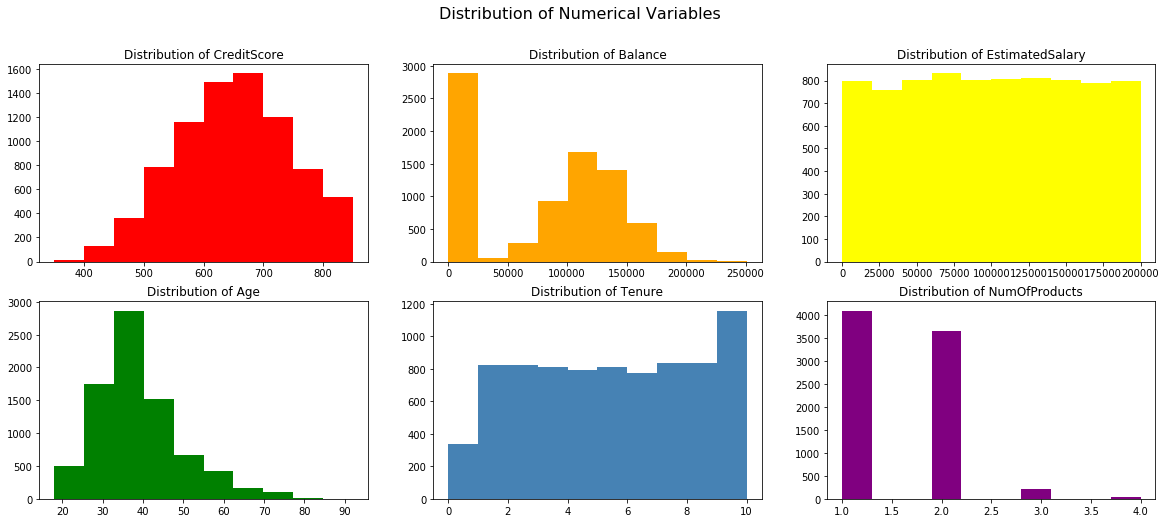

In [23]:
### Under standing the distrribution of numerical data
fig, ax = plt.subplots(2, 3, figsize = (20, 8))
fig.suptitle('Distribution of Numerical Variables', fontsize = 16)
ax[0, 0].hist(Train['CreditScore'], color = 'red')
ax[0, 0].set_title('Distribution of CreditScore')
ax[0, 1].hist(Train['Balance'], color = 'orange')
ax[0, 1].set_title('Distribution of Balance')
ax[0, 2].hist(Train['EstimatedSalary'], color = 'yellow')
ax[0, 2].set_title('Distribution of EstimatedSalary')
ax[1, 0].hist(Train['Age'], color = 'green')
ax[1, 0].set_title('Distribution of Age')
ax[1, 1].hist(Train['Tenure'], color = 'Steelblue')
ax[1, 1].set_title('Distribution of Tenure')
ax[1, 2].hist(Train['NumOfProducts'], color = 'purple')
ax[1, 2].set_title('Distribution of NumOfProducts')
plt.show()

#### What we can learn from the distribution
- CreditScore: It's approximately a normal distribution, most of the creditscore is crowded around 600-700, only few of them is lower than 500. 
- Balance: Except the part that people have zero balance, the other part of people's balance is approximately normally distributed.
- EstimatedSalary: It's a uniform distribution.
- Age: It's approximately a lognormal distribution. Most of people in our dataset is around 30-50.
- Tenure: It's uniform distribution, except there are more people have ten years Tenure and less people have 0 tenure.
- NumOfProducts: There are only four possibilities here. Most people only have one or two products. Only few of them have 3 or 4 products.

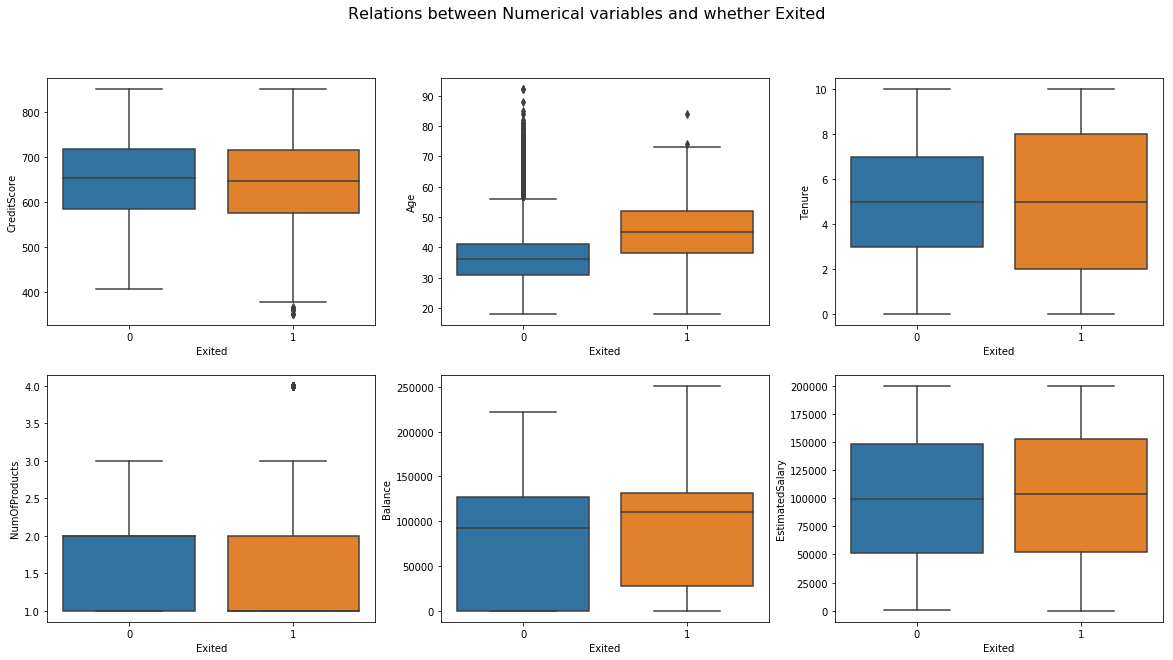

In [26]:
### Understanding the Distribution of Numerical Variables and the relations with independent variable
fig,axs = plt.subplots(2,3, figsize=[20,10])
fig.suptitle('Relations between Numerical variables and whether Exited', fontsize = 16)
sns.boxplot(x = 'Exited', y = 'CreditScore', data = Train, ax = axs[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = Train, ax = axs[0][1])
sns.boxplot(x = 'Exited', y = 'Tenure', data = Train, ax = axs[0][2])
sns.boxplot(x = 'Exited', y = 'NumOfProducts', data = Train, ax = axs[1][0])
sns.boxplot(x = 'Exited', y = 'Balance', data = Train, ax = axs[1][1])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = Train, ax = axs[1][2])

#### What we can learn from the boxplot
- CreditScore: There is no significant difference between the distribution of CreditScore under both conditions.
- Age: Under the condition that the customer exited, the average age is significantly higher than the mean of customer who did not exit. It shows a higher chance that customer will exit at an older age.
- Tenure: The mean is almost the same under each conditions.
- NumberOfProducts: As the distribution graph we plotted above shows, most of people only have one or two products, so under each condition, most of data is 1 or 2. But in the case that customer exited, there are several outliers which means that all people with 4 products exited.
- Balance: Worryingly, the bank is losing customer with significant balance in the bank.
- Estimated Salary: No significant difference between two conditions.

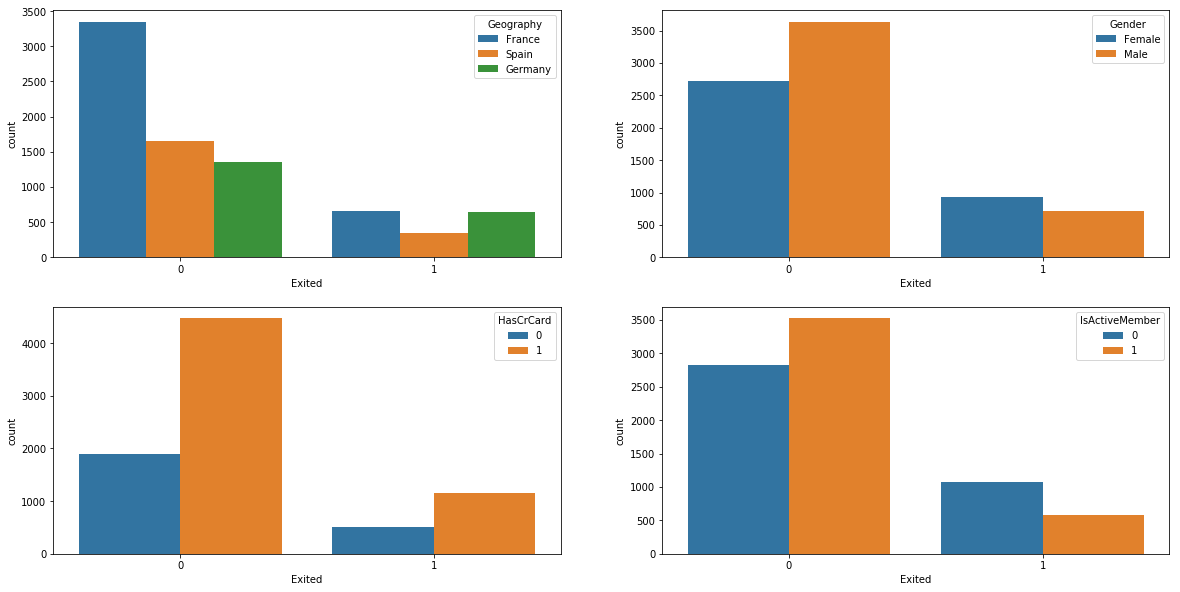

In [27]:
### Understanding the relationship between catagorical variables and dependent variable
_, axs = plt.subplots(2,2, figsize=[20, 10])
sns.countplot(x = 'Exited', hue = 'Geography', data = Train, ax = axs[0][0])
sns.countplot(x = 'Exited', hue = 'Gender', data = Train, ax = axs[0][1])
sns.countplot(x = 'Exited', hue = 'HasCrCard', data = Train, ax = axs[1][0])
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = Train, ax = axs[1][1])

#### What can we learn from countplot
- Geography: Majority of customers are from France. Customers in Germany have a much higher probability to churn.
- Gender: It's obvious that women are more likely to churn. 
- HasCrCard: Majority customers in the bank have credit card. We need to calculate the probability to get further conclusions.
- Is ActiveMember: Active member shows a lower possibility to churn in the graph. But we still don't know if there is way to measure the degree of 'active'.

In [56]:
def Compute_Catagorical_Probability(df, col_name, y_name):
    # Compute the probability of y = 1 when x in different catagories. This function can only be used when y is a binary variable
    # df: the dataset contains both the catagorical variable and dependent variable
    # col_name: A string, the name of the column that we want to analysis
    # y_name: A string, the name of the dependent variable
    # Return: two lists, one is the names of all the catagories, the other one is the corresponding probability
    unique_target = sorted(list(df[col_name].drop_duplicates()))
    col = []
    pro = []
    for item in unique_target:
        prob = df[df[col_name] == item][y_name].mean()
        col.append(str(item))
        pro.append(prob) 
    return col, pro

def Plot_Catagorical_Probability(ax, df, col_name, y_name, color):
    # Plot the probability bar chart
    # ax: the ax that we want to use to plot
    # df: the dataset contains both the catagorical variable and dependent variable
    # col_name: A string, the name of the column that we want to analysis
    # y_name: A string, the name of the dependent variable
    # color: the color of the graph
    # Return: None
    col, pro = Compute_Catagorical_Probability(df, col_name, y_name)
    ax.bar(col, pro, color = color)
    ax.set_title(col_name)

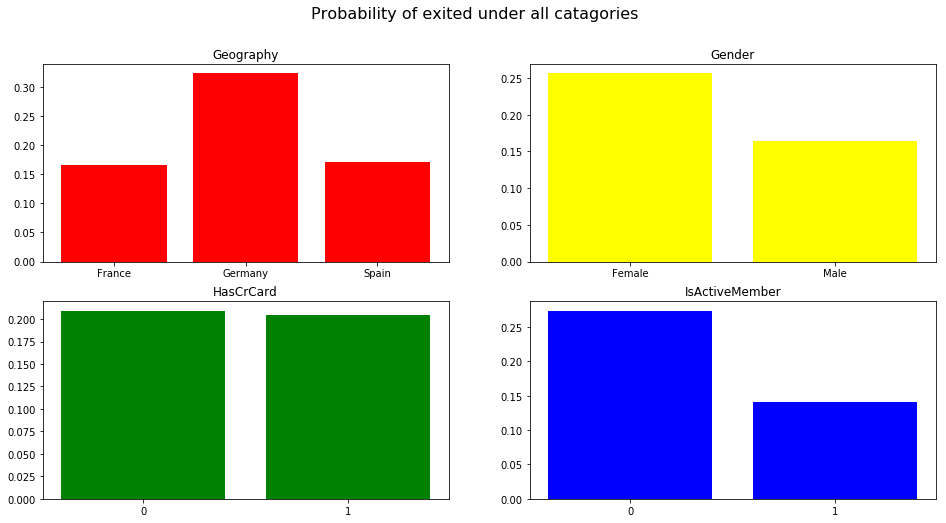

In [57]:
fig, axs = plt.subplots(2, 2, figsize = [16, 8])
fig.suptitle('Probability of exited under all catagories', fontsize = 16)
Plot_Catagorical_Probability(axs[0, 0], Train, 'Geography', 'Exited', 'red')
Plot_Catagorical_Probability(axs[0, 1], Train, 'Gender', 'Exited', 'yellow')
Plot_Catagorical_Probability(axs[1, 0], Train, 'HasCrCard', 'Exited', 'green')
Plot_Catagorical_Probability(axs[1, 1], Train, 'IsActiveMember', 'Exited', 'blue')
plt.show()

#### What can we learn from the probability plot
- Customer in Spain has the lowest probability to exit. The probability of france and Spain is almost the same.
- Female is more likely to churn.
- Customer has credit card or not does not affect possibility to exit.
- As we think, active member has a much lower probability to churn.

### 2.3 Understanding the relations between variables

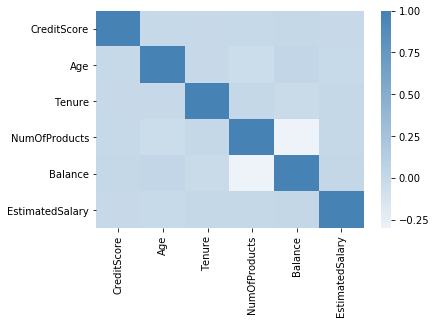

In [49]:
# Select color range
pal_light = sns.light_palette('steelblue', as_cmap = True)
# correlations between features
corr_score = Train[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()               
# show heapmap of correlations
sns.heatmap(corr_score, cmap = pal_light)

In [50]:
# Check the correlation
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,0.001999,-0.001328,0.003220,0.009361,-0.004999
Age,0.001999,1.000000,-0.002378,-0.034809,0.026885,-0.009773
Tenure,-0.001328,-0.002378,1.000000,0.012573,-0.016858,0.007535
NumOfProducts,0.003220,-0.034809,0.012573,1.000000,-0.300575,0.007804
Balance,0.009361,0.026885,-0.016858,-0.300575,1.000000,0.024345
EstimatedSalary,-0.004999,-0.009773,0.007535,0.007804,0.024345,1.000000


- From the heatmap above, we can note that the correlation between each variable is low. It's safe for us to assume that there is no collinearity when we apply linear model.

### From the analysis above, we still have several problems to solve
- Is Age linearly correlated with the probability to churn?
- There are so many zero balance in the dataset, is that missing value?
- How to understand Tenure?
- Is CreditScore linearly correlated with the probability to churn?
- How to understand EstimatedSalary

### 2.4 Deep dive: Understading Age

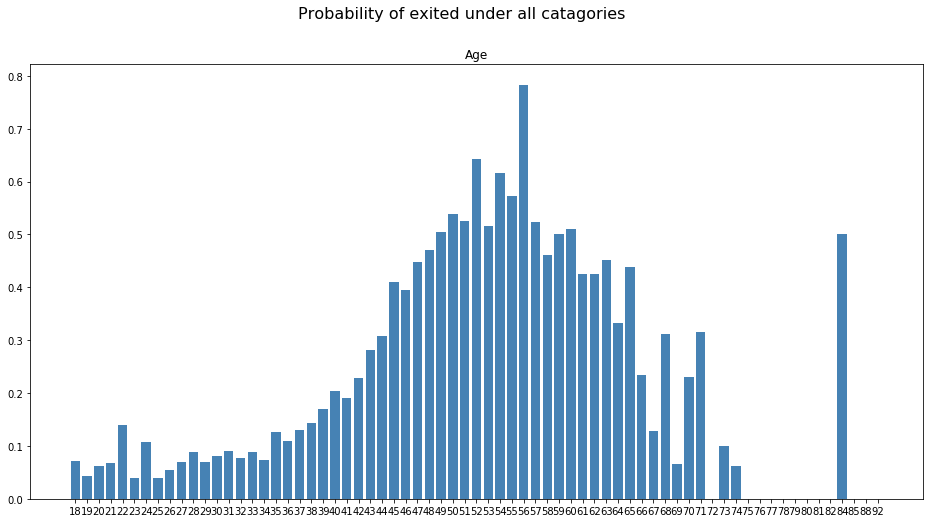

In [58]:
# Exploring data to understand the correlation between age and exited
fig, axs = plt.subplots(figsize = [16, 8])
fig.suptitle('Probability of exited under all catagories', fontsize = 16)
Plot_Catagorical_Probability(axs, Train, 'Age', 'Exited', 'steelblue')

- It is obvious to see that the relation between age and the possibility to exit is not linear. Customers with small age and very old age tend not to churn while customers who are older than 40 and younger than 66 are more likely to churn. But at the old age, it's also not sure. Some age such as 65, 68, 71, 84 have a very high possibility to churn.

In [62]:
# To figure our what happens on older age. I need to find out if there is enough sample there.
def check_sample_num(df, col_name):
    # Define a function to check sample number of different catagories
    # df: the dataframe
    # col_name: the column name that we want to check
    # Return: items list and A col_number list
    unique_target = sorted(list(df[col_name].drop_duplicates()))
    num_list = []
    for item in unique_target:
        num = df[df[col_name] == item].shape[0]
        num_list.append(num)
    return unique_target, num_list

Text(0, 0.5, 'Number')

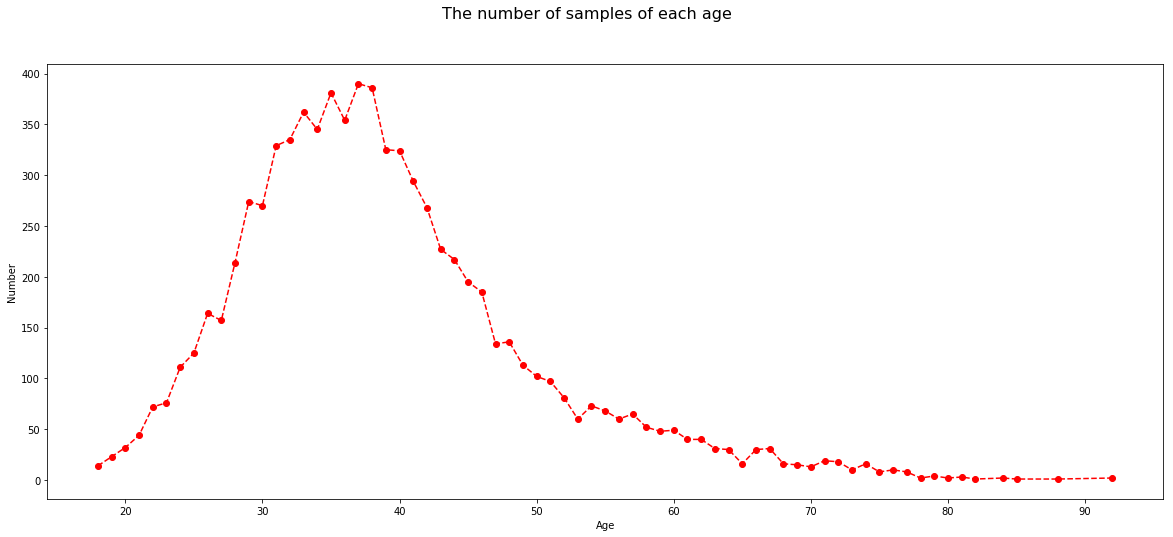

In [64]:
# Plot the number of samples at each age
fig, axs = plt.subplots(figsize = [20, 8])
fig.suptitle('The number of samples of each age', fontsize = 16)
items, nums = check_sample_num(Train, 'Age')
axs.plot(items, nums, color = 'r', linestyle = '--', marker = 'o')
axs.set_xlabel('Age')
axs.set_ylabel('Number')

In [70]:
pd.DataFrame(nums, index = items, columns = ['Number']).T.iloc[:, 50:]

,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,88,92
Number,16,15,13,19,18,10,16,8,10,8,2,4,2,3,1,2,1,1,2


- Now, we could say that the high volatile in the older age range may be caused by the lack of samples. But we still can conclude that we need to add a square of age column to Train data_set in order to get a better result.

### 2.5 Deep Dive: Understading Balance

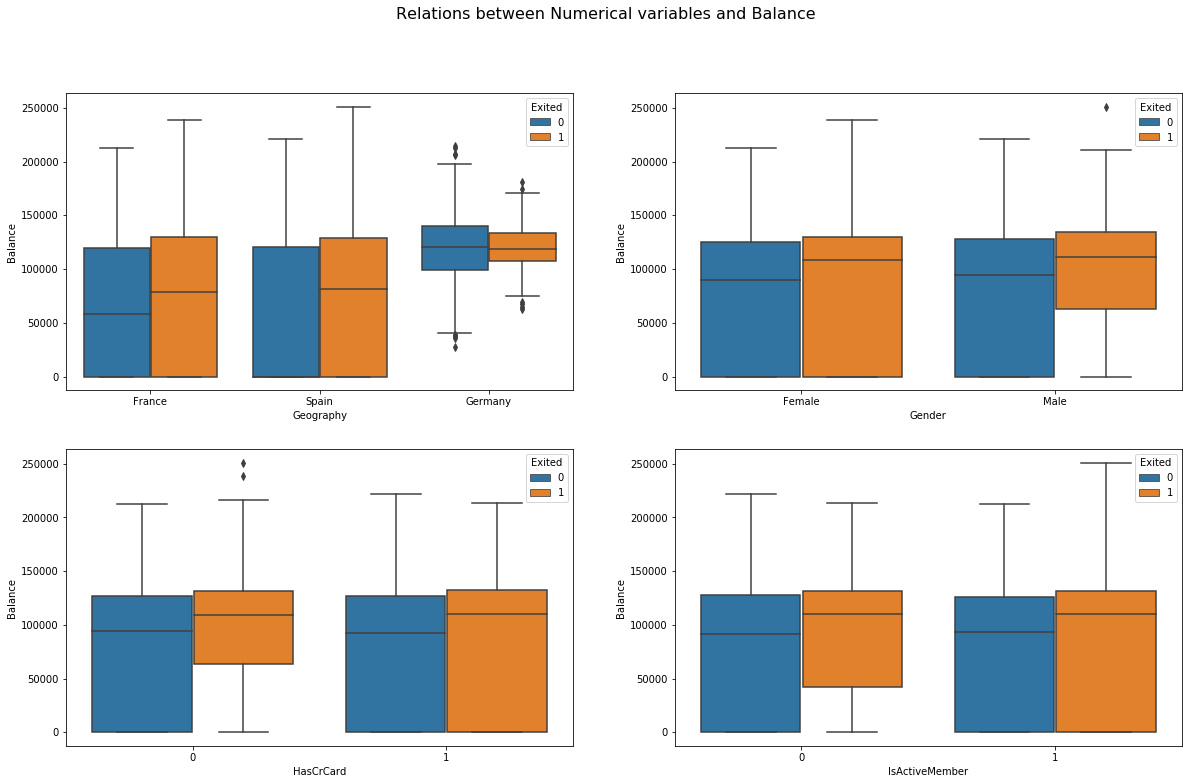

In [84]:
fig,axs = plt.subplots(2,2, figsize=[20,12])
fig.suptitle('Relations between Numerical variables and Balance', fontsize = 16)
sns.boxplot(x = 'Geography', y = 'Balance', hue = 'Exited', data = Train, ax = axs[0][0])
sns.boxplot(x = 'Gender', y = 'Balance', hue = 'Exited', data = Train, ax = axs[0][1])
sns.boxplot(x = 'HasCrCard', y = 'Balance', hue = 'Exited', data = Train, ax = axs[1][0])
sns.boxplot(x = 'IsActiveMember', y = 'Balance', hue = 'Exited', data = Train, ax = axs[1][1])

#### We can note from the graph:
- It's obvious that in France and Spain the bank is losing customers with significantly higher balance. But in Germany, it's a little different. The average of balance of customers who do not churn is slightly higher than those who exited. But the it's distributed in a wider range.
- For gender, it's obvious that in each gender, customers with higher balance is more likely to churn.
- For customers who do not have a credit card in this bank, customers with high balance are more likely to churn. And same as variable 'IsActiveMember', customers who are not active member, who have high balance are more likely to churn. It is easy to make sense that people who doesn't have too much constraints here, but have high balance will leave this bank. We can guess that the bank cannot provide sufficient services or services good enough for those who are wealth compared to other banks.

#### Important Suspision:
- I don't believe all result above, especially the mean. Because the mean of each group is highly affected by the number of zero. It seems that Germany is more wealthy, average balance is much higher, but maybe there is no zero samples in the Germany. Then it raises a guess, is zero in balance a missing value?

#### To test whether 0 in balance is missing value, we need to do:
- Test whether the distribution of other variables are similar under balance is 0 and balance is not 0.
- Test the if there is significant difference between the correlation matrix under two conditions

In [85]:
# Now, we want to explore why people exited the bank still have balance in the bank.
# First, we want to separate dataset with balance == 0 and balance != 0
z_df = Train[Train['Balance'] == 0]
n_df = Train[Train['Balance'] != 0]

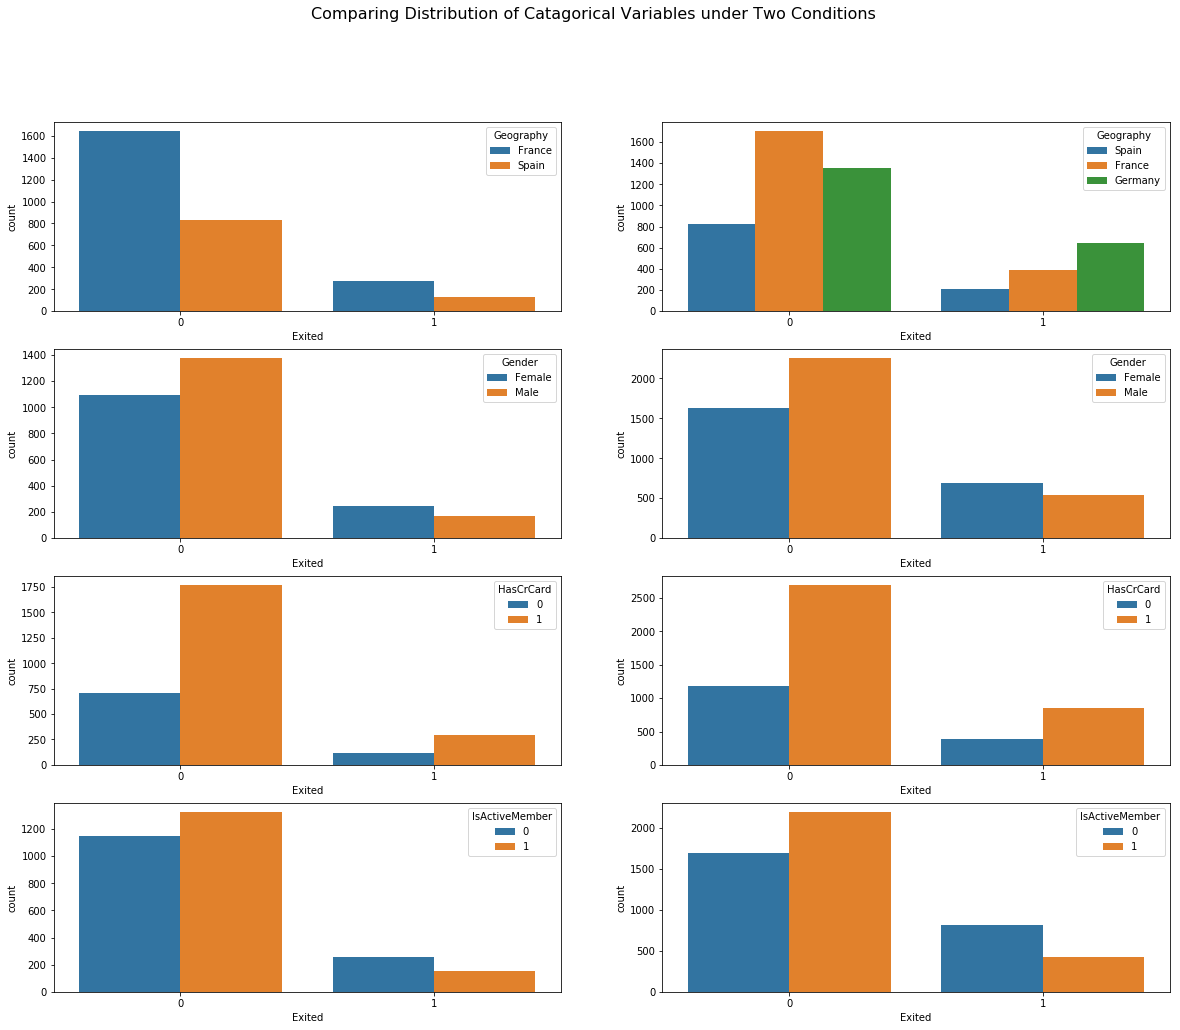

In [87]:
# Secondly, we want to plot the conditional distribution of catagorical variables under two conditions
fig, axs = plt.subplots(4, 2, figsize=[20, 16])
fig.suptitle('Comparing Distribution of Catagorical Variables under Two Conditions', fontsize = 16)
sns.countplot(x = 'Exited', hue = 'Geography', data = z_df, ax = axs[0][0])
sns.countplot(x = 'Exited', hue = 'Gender', data = z_df, ax = axs[1][0])
sns.countplot(x = 'Exited', hue = 'HasCrCard', data = z_df, ax = axs[2][0])
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = z_df, ax = axs[3][0])

sns.countplot(x = 'Exited', hue = 'Geography', data = n_df, ax = axs[0][1])
sns.countplot(x = 'Exited', hue = 'Gender', data = n_df, ax = axs[1][1])
sns.countplot(x = 'Exited', hue = 'HasCrCard', data = n_df, ax = axs[2][1])
sns.countplot(x = 'Exited', hue = 'IsActiveMember', data = n_df, ax = axs[3][1])

- Except Geography, it's obvious that all other catagorical variables have the same distribution under two different conditions. For geography, I guess it's because in different region, the data quality is not the same. In Germany, data quaility is really high. In France and Spain, more missing value exist.

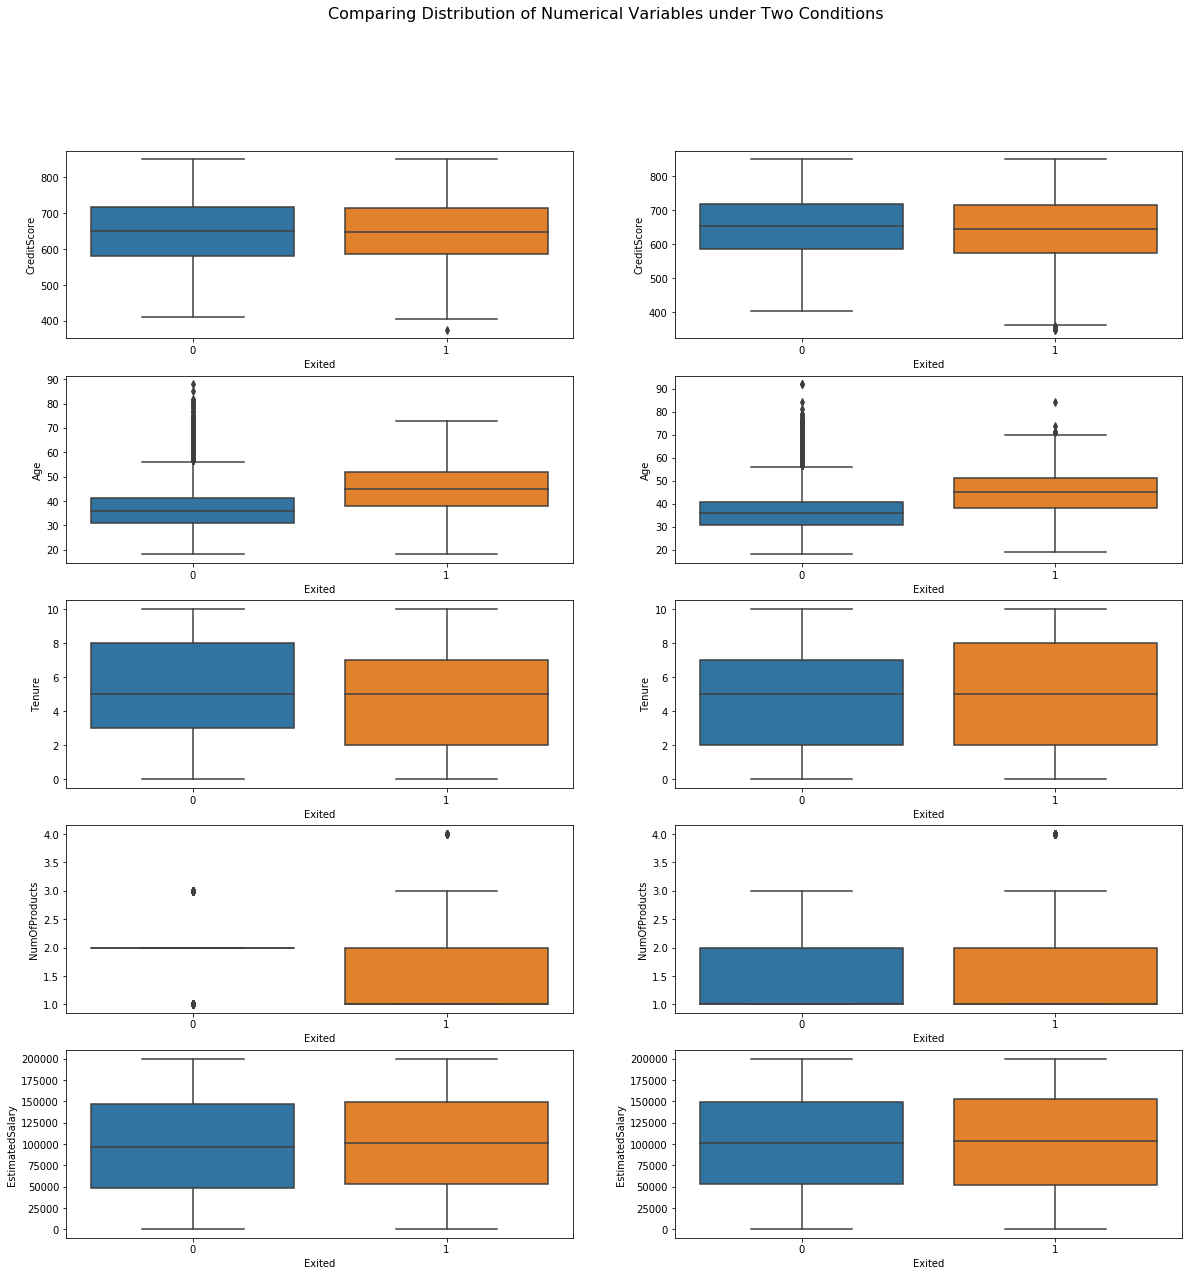

In [89]:
# Thirdly, I need to test whether the distribution of numerical variables are the similar
fig,axs = plt.subplots(5,2, figsize=[20,20])
fig.suptitle('Comparing Distribution of Numerical Variables under Two Conditions', fontsize = 16)
sns.boxplot(x = 'Exited', y = 'CreditScore', data = z_df, ax = axs[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = z_df, ax = axs[1][0])
sns.boxplot(x = 'Exited', y = 'Tenure', data = z_df, ax = axs[2][0])
sns.boxplot(x = 'Exited', y = 'NumOfProducts', data = z_df, ax = axs[3][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = z_df, ax = axs[4][0])

sns.boxplot(x = 'Exited', y = 'CreditScore', data = n_df, ax = axs[0][1])
sns.boxplot(x = 'Exited', y = 'Age', data = n_df, ax = axs[1][1])
sns.boxplot(x = 'Exited', y = 'Tenure', data = n_df, ax = axs[2][1])
sns.boxplot(x = 'Exited', y = 'NumOfProducts', data = n_df, ax = axs[3][1])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = n_df, ax = axs[4][1])

- From the graph above, we can find out that CreditScore, Age, EstimatedSalary has almost the same distribution under two conditions.
- There is slightly difference between balance is 0 and not in Tenure. It shows that people with higher Tenure is more likely to have zero balance. But it's not statistically significant.
- It shows most of customers with zero balance have two products in the bank from the boxplot. But it's not clear what happens inside of the data. So I need to plot the NumOfProducts and Tenure in another way.

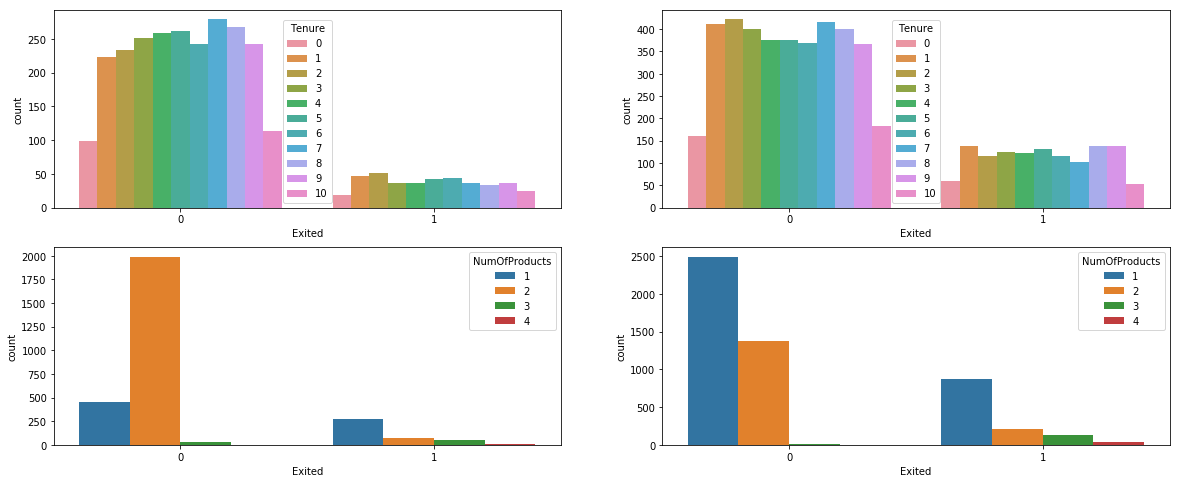

In [90]:
fig, axs = plt.subplots(2, 2, figsize=[20, 8])
sns.countplot(x = 'Exited', hue = 'Tenure', data = z_df, ax = axs[0][0])
sns.countplot(x = 'Exited', hue = 'NumOfProducts', data = z_df, ax = axs[1][0])

sns.countplot(x = 'Exited', hue = 'Tenure', data = n_df, ax = axs[0][1])
sns.countplot(x = 'Exited', hue = 'NumOfProducts', data = n_df, ax = axs[1][1])

- Here we can see it clearly. Distribution of tenure is very similar. while distribution of NumofProducts is very different. majority of customers who has zero balance has two products in the bank when they do not exit. While most of customers who have non-zero balance only have one product. 
- In order to find out why, we can try to find out whether the ditribution of Number of products is different among region. Because Germany has no zero balance customer.

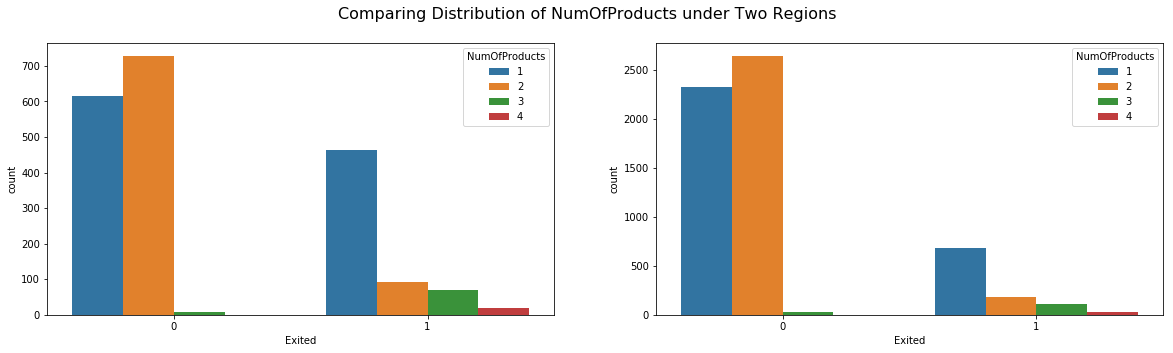

In [104]:
# Separate region
G_df = Train[Train['Geography'] == 'Germany']
O_df = Train[Train['Geography'] != 'Germany']

fig, axs = plt.subplots(1, 2, figsize=[20, 5])
fig.suptitle('Comparing Distribution of NumOfProducts under Two Regions', fontsize = 16)
sns.countplot(x = 'Exited', hue = 'NumOfProducts', data = G_df, ax = axs[0])
sns.countplot(x = 'Exited', hue = 'NumOfProducts', data = O_df, ax = axs[1])

- This graph can help us to understand a part of this. In Germany, majority of customers who churn has only one products. But it still can't explain the huge difference between customers who does not churn. I guess that maybe the data team in the bank lose some data both from Spain or France and have two products.

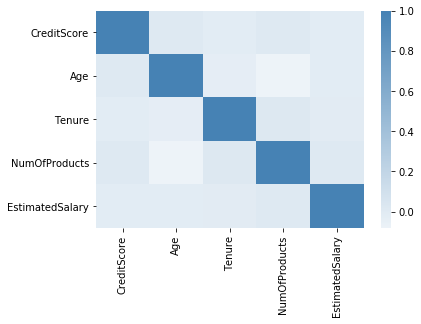

In [95]:
# compute correlation matrix
corr_score_1 = z_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']].corr()
corr_score_2 = n_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']].corr()              
# show heapmap of correlations
sns.heatmap(corr_score_1, cmap = pal_light)

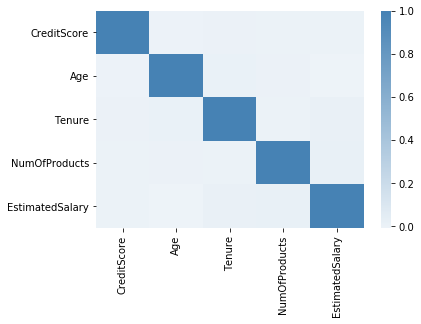

In [96]:
sns.heatmap(corr_score_2, cmap = pal_light)

In [97]:
corr_score_1

,CreditScore,Age,Tenure,NumOfProducts,EstimatedSalary
CreditScore,1.000000,0.013421,-0.011543,0.019656,-0.013359
Age,0.013421,1.000000,-0.028949,-0.081667,-0.012954
Tenure,-0.011543,-0.028949,1.000000,0.020780,-0.007571
NumOfProducts,0.019656,-0.081667,0.020780,1.000000,0.014053
EstimatedSalary,-0.013359,-0.012954,-0.007571,0.014053,1.000000


In [98]:
corr_score_2

,CreditScore,Age,Tenure,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004820,0.004469,-0.000140,-0.000655
Age,-0.004820,1.000000,0.013299,0.003107,-0.009421
Tenure,0.004469,0.013299,1.000000,0.000846,0.016651
NumOfProducts,-0.000140,0.003107,0.000846,1.000000,0.018847
EstimatedSalary,-0.000655,-0.009421,0.016651,0.018847,1.000000


- There is no significance between the two correlation matrix. but we can find out, when balance is not zero, correlations between variables are closer to 0. 

### Conclusions: We can believe that balance has missing values
- Reason 1: It's impossible that Germany has no customers have zero balance in bank while lots of customers in another two countries have zero balance.
- Reason 2: Almost all customers have the same distributions whether balance is 0.
- Reason 3: The correlation matrixs under two conditions are almost the same.
- I guess that maybe the data team in the bank lose some data both from Spain or France and have two products.

#### Since we believe that balance has missing values, how can we fix that?
- First, we can try to plot scatter plot among numerical variables and to see if we can build some models to predict and fill the missing value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a39b6b438>,
      dtype=object)

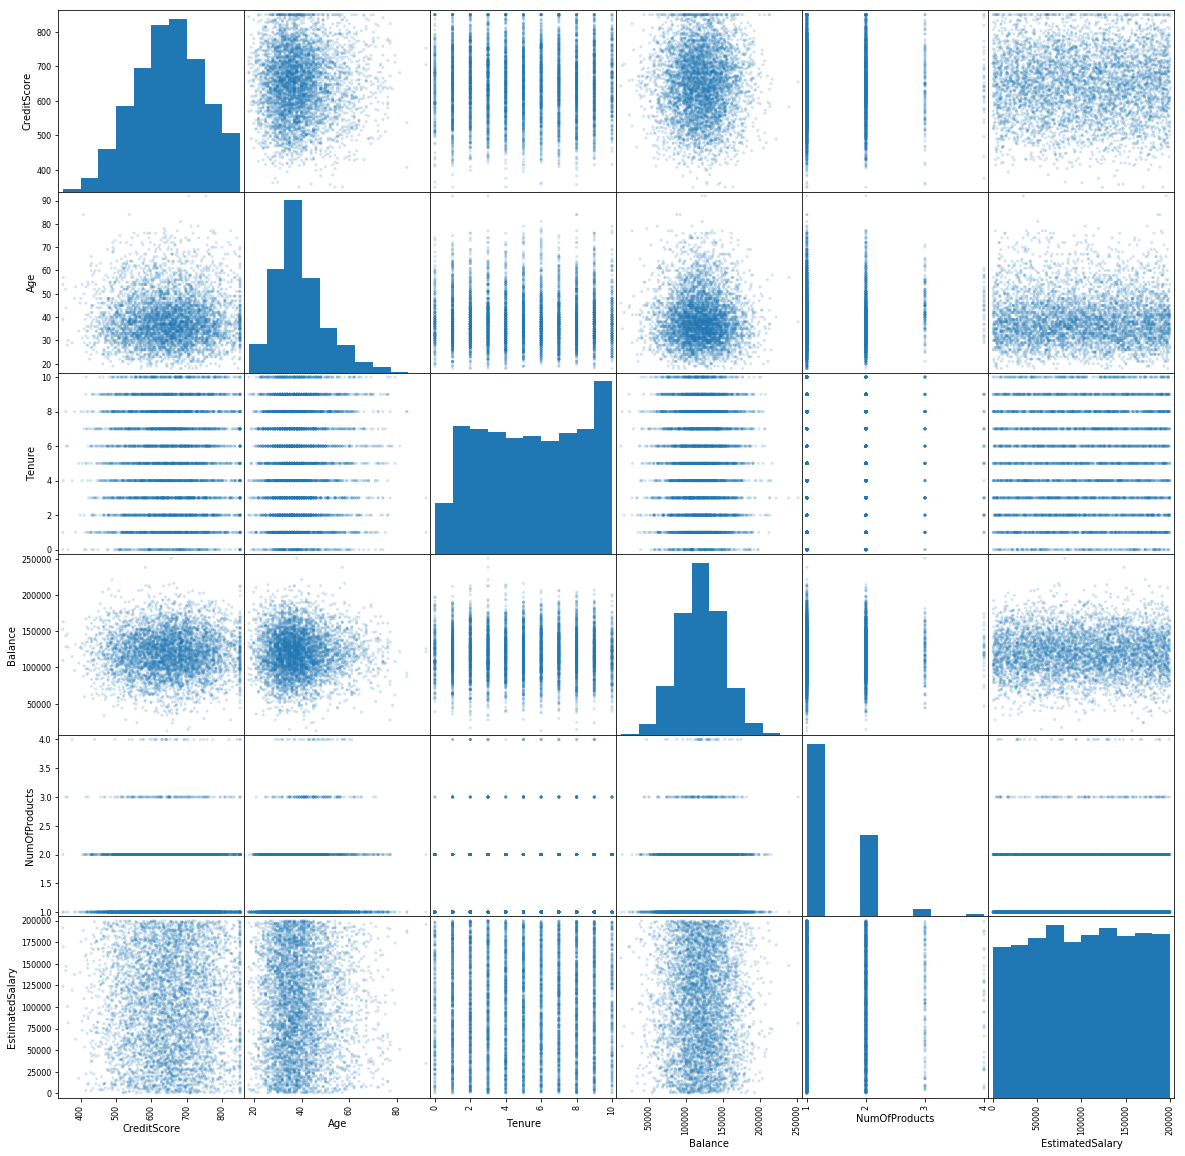

In [108]:
pd.plotting.scatter_matrix(n_df[num_val], alpha = 0.2, figsize=[20, 20])

- We can note that there is no correlation between balance and other numerical variables. We can't build a model to fill the missing value. In the modeling step, we may need to remove this variable from dataset. Otherwise, the zeros would be noise.

### 2.6 Deep Dive: Understanding Tenure

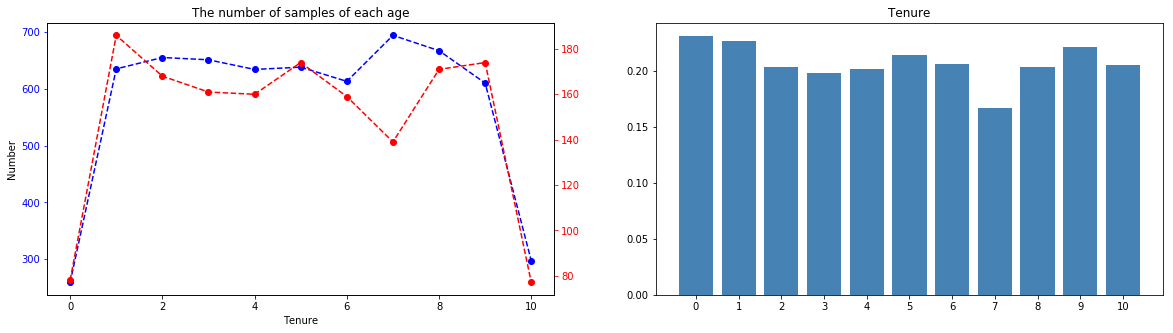

In [120]:
# Plot the number of samples at each Tenure
fig, ax = plt.subplots(1, 2, figsize = [20, 5])
items, nums = check_sample_num(Train[Train['Exited'] == 0], 'Tenure')
ax[0].plot(items, nums, color = 'b', linestyle = '--', marker = 'o')
items, nums = check_sample_num(Train[Train['Exited'] == 1], 'Tenure')
ax2 = ax[0].twinx()
ax2.plot(items, nums, color = 'r', linestyle = '--', marker = 'o')
ax[0].set_xlabel('Tenure')
ax[0].set_ylabel('Number')
ax[0].tick_params(axis = 'y', colors = 'blue')
ax2.tick_params(axis = 'y', colors = 'red')
ax[0].set_title('The number of samples of each age')

Plot_Catagorical_Probability(ax[1], Train, 'Tenure', 'Exited', 'Steelblue')

- From the two graphs above, we know some basic information about tenure. Most samples has tenure 1-9 years. Only few of them have 0 or 10 years. The probability of exit is almost the same under different tenures.

#### Then, how do we understand tenure. Is it correlated with age?

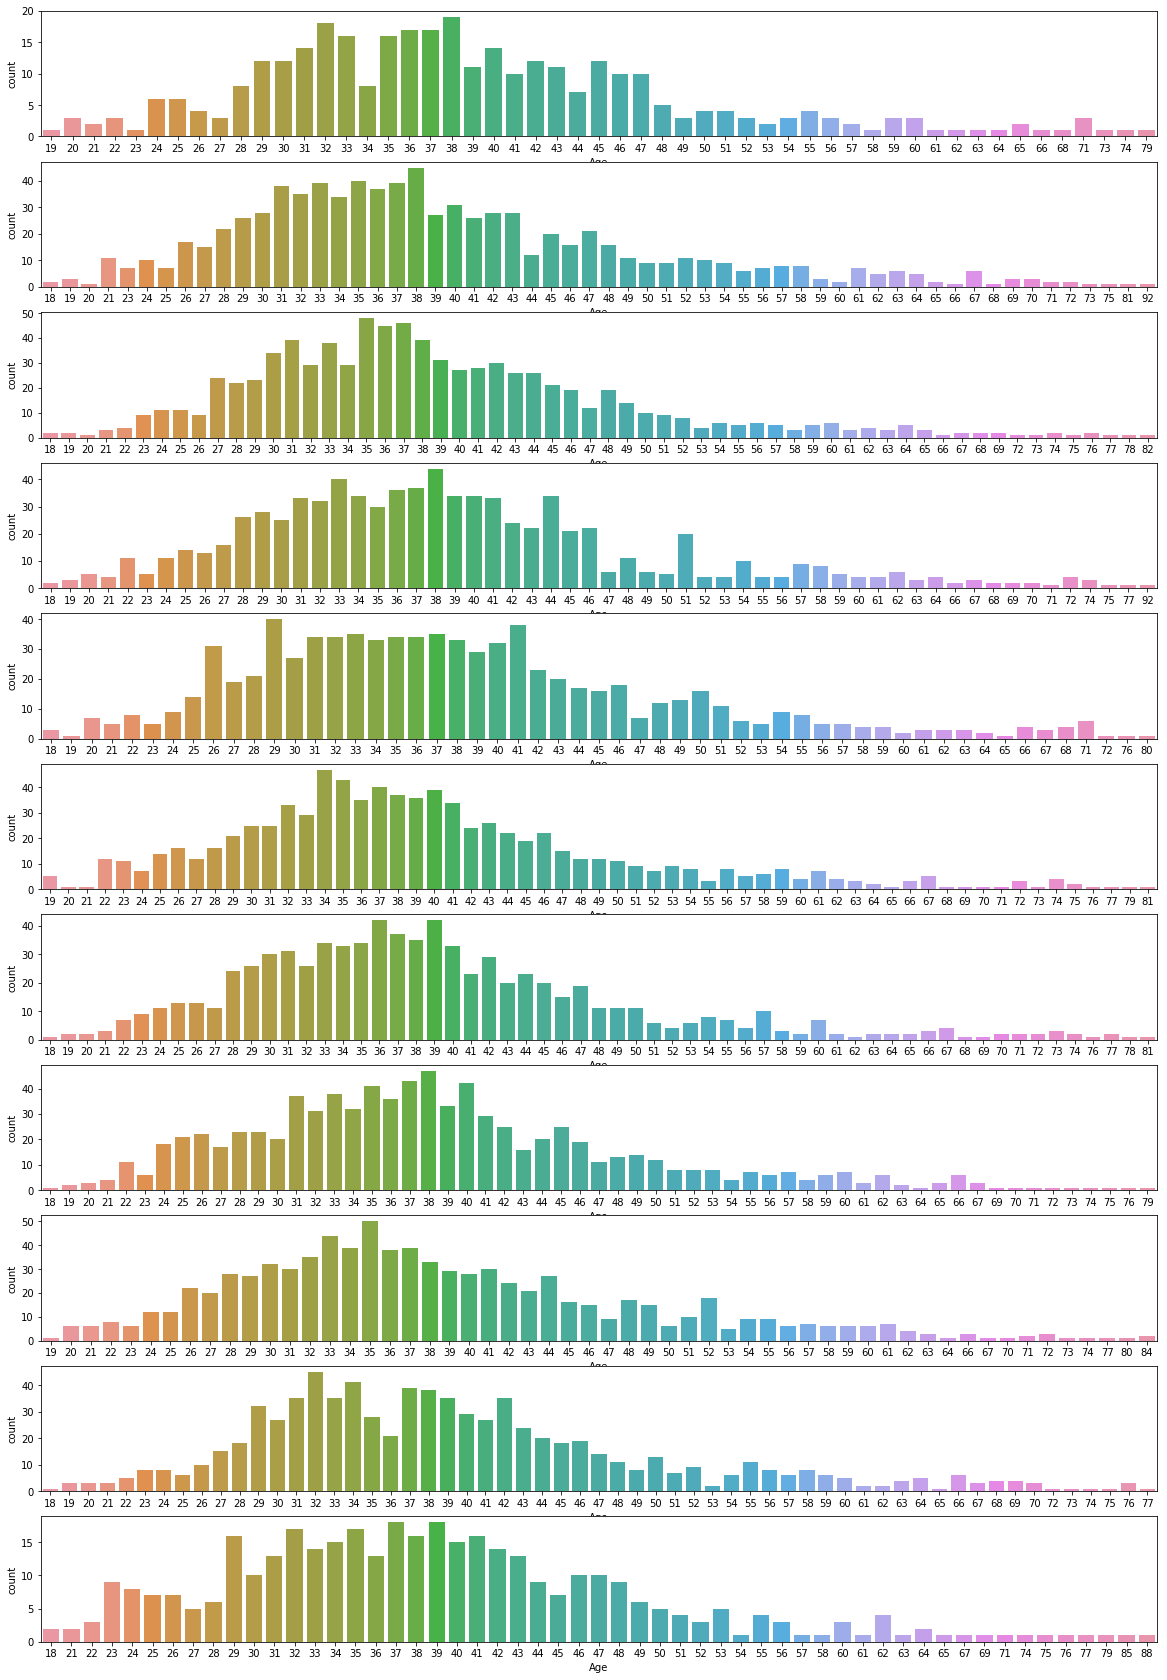

In [123]:
fig, axs = plt.subplots(11, 1, figsize = [20, 30])
sns.countplot(x = 'Age', data = Train[Train['Tenure'] == 0], ax = axs[0])
sns.countplot(x = 'Age', data = Train[Train['Tenure'] == 1], ax = axs[1])
sns.countplot(x = 'Age', data = Train[Train['Tenure'] == 2], ax = axs[2])
sns.countplot(x = 'Age', data = Train[Train['Tenure'] == 3], ax = axs[3])
sns.countplot(x = 'Age', data = Train[Train['Tenure'] == 4], ax = axs[4])
sns.countplot(x = 'Age', data = Train[Train['Tenure'] == 5], ax = axs[5])
sns.countplot(x = 'Age', data = Train[Train['Tenure'] == 6], ax = axs[6])
sns.countplot(x = 'Age', data = Train[Train['Tenure'] == 7], ax = axs[7])
sns.countplot(x = 'Age', data = Train[Train['Tenure'] == 8], ax = axs[8])
sns.countplot(x = 'Age', data = Train[Train['Tenure'] == 9], ax = axs[9])
sns.countplot(x = 'Age', data = Train[Train['Tenure'] == 10], ax = axs[10])

- From the countplot above and scatter plot above, we can conclude that tenure is not correlated with age. Under different tenure, the distributions of age are almost the same.

#### Now, we want to test whether it's correlated with HasCrCard and IsActiveMember

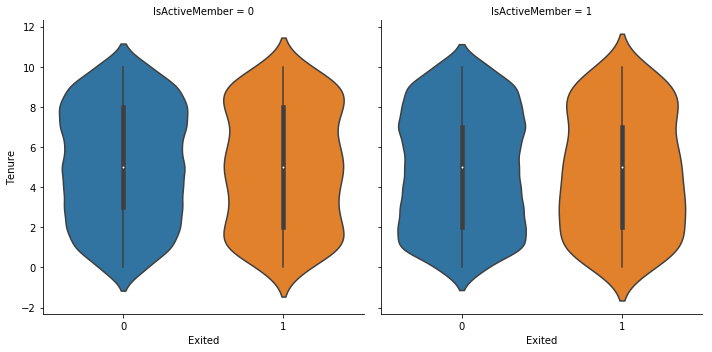

In [131]:
sns.catplot(x = 'Exited', y = 'Tenure', col = 'IsActiveMember', data = Train, kind = 'violin')

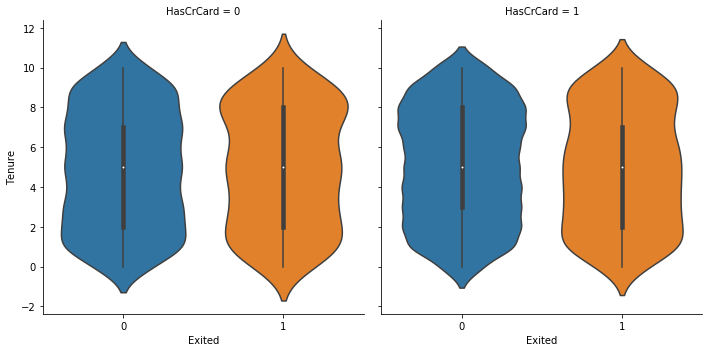

In [132]:
sns.catplot(x = 'Exited', y = 'Tenure', col = 'HasCrCard', data = Train, kind = 'violin')

- From the graph above, we can conclude that Tenure is independent from IsActiveMember and HasCrCard. The combinations cannot help use to improve our model.

### 2.7 Deep Dive: Understanding CreditScore

Text(0, 0.5, 'Number')

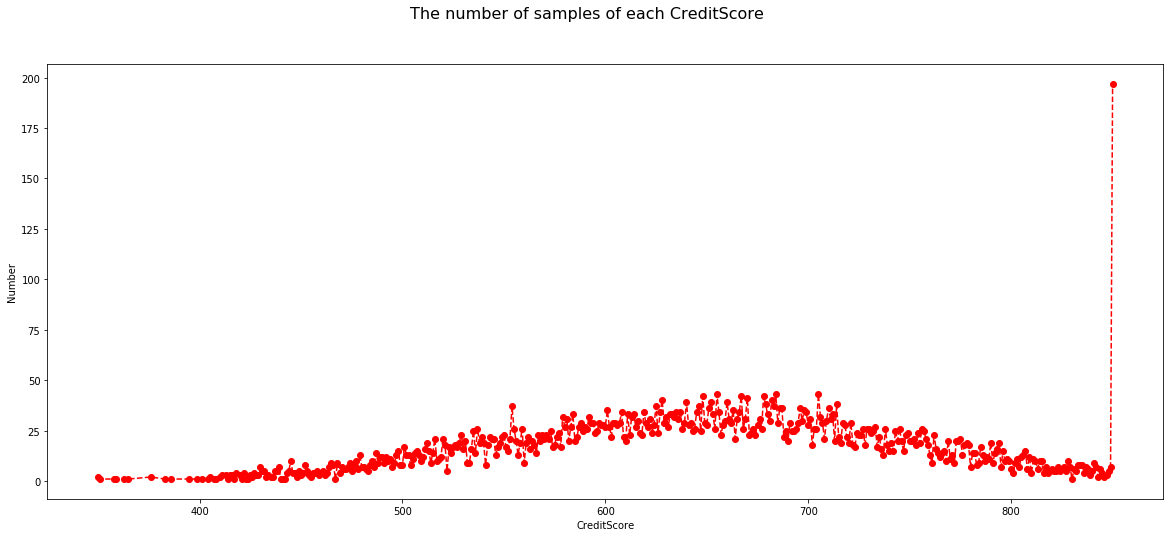

In [133]:
# Plot the number of samples at each CreditScore
fig, axs = plt.subplots(figsize = [20, 8])
fig.suptitle('The number of samples of each CreditScore', fontsize = 16)
items, nums = check_sample_num(Train, 'CreditScore')
axs.plot(items, nums, color = 'r', linestyle = '--', marker = 'o')
axs.set_xlabel('CreditScore')
axs.set_ylabel('Number')

- We can note that most credit score has no more than 50 samples, while when it arrives 850, it has 197 samples. I guess that the maximum number of credit score is 850. Now, we could try to plot the probability graph to see whether credit score is linearly correlated with the probability to churn. However, there are so many catagories here is we want to treat it as a catagorical variable and also there are not enough samples for us to analysis at some certain range. Therefore, I will create some basket to understand how probability of churn changes as credit score increase.

In [143]:
def Create_Basket(df, col_name, bins):
    # Define a function to help to basket the numerical numbers
    # df: the dataframe
    # col_name: the columns name of the variable that we want to basket
    # bins: the range of the bins in each basket
    # Return: A new data frame with basket column and remove previous column
    # Step 1: Create the basket bins
    min_num = df[col_name].min()
    max_num = df[col_name].max()
    bin_list = []
    a = min_num - 1
    b = a + bins
    while a < max_num:
        bin_list.append((a, b))
        a = b
        b = b + bins
    
    # Step 2: Define distinguish function
    def basket(x):
        for i in range(len(bin_list)):
            lower = bin_list[i][0]
            upper = bin_list[i][1]
            if x > lower and x <= upper:
                return str(lower) + '-' + str(upper)
    
    # Step 3: Create new column and apply the function
    df[col_name + '_basket'] = df[col_name].apply(lambda x: basket(x))
    
    # Step 4: Remove the previous columns
    df = df.drop([col_name], axis = 1)
    
    return df

In [157]:
def Plot_Basket_Probability(df, col_name, bins, ax, color):
    # Define a function to plot bar chart to show the probability of each basket
    # This function is only designed for cases when y is binary distributed
    # df: the dataframe
    # col_name: the columns name of the variable that we want to basket
    # bins: the range of the bins in each basket
    # ax: the ax that we want to plot
    # color: the color of the chart
    # Return: None
    df = Create_Basket(df, col_name, bins)
    col, pro = Compute_Catagorical_Probability(df, col_name + '_basket', 'Exited')
    ax.bar(col, pro, color = color)
    ax.set_title(col_name + ' basket' + 'bins = ' + str(bins))    

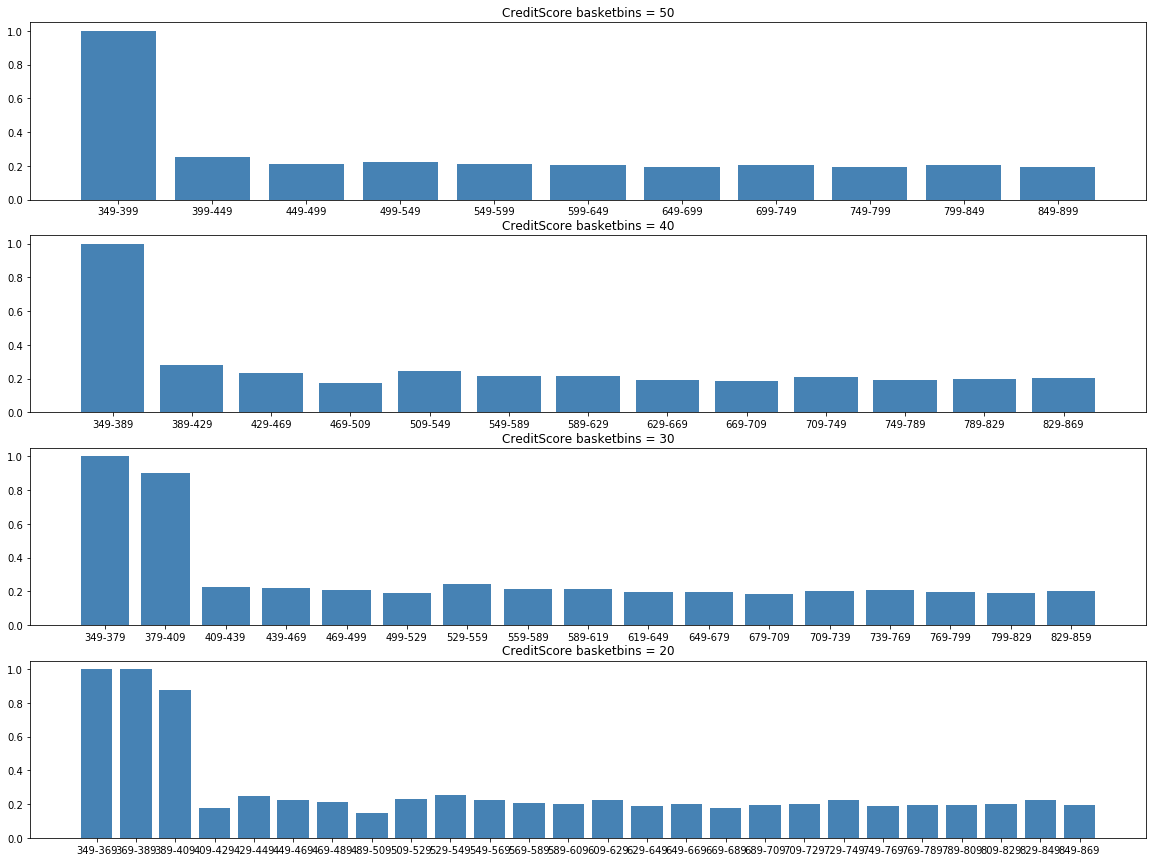

In [158]:
fig, axs = plt.subplots(4, 1, figsize = [20, 15])
Plot_Basket_Probability(Train, 'CreditScore', 50, axs[0], 'steelblue')
Plot_Basket_Probability(Train, 'CreditScore', 40, axs[1], 'steelblue')
Plot_Basket_Probability(Train, 'CreditScore', 30, axs[2], 'steelblue')
Plot_Basket_Probability(Train, 'CreditScore', 20, axs[3], 'steelblue')

- Therefore, we can note that when Credit score is lower than 409, customers are more likely to churn. but when it's larger than 409, the probability are almost the same. I ploted the bar chart under bins equals to 20, 30, 40 50. We can get the same result.

### 2.8 Deep Dive: Understanding EstimatedSalary

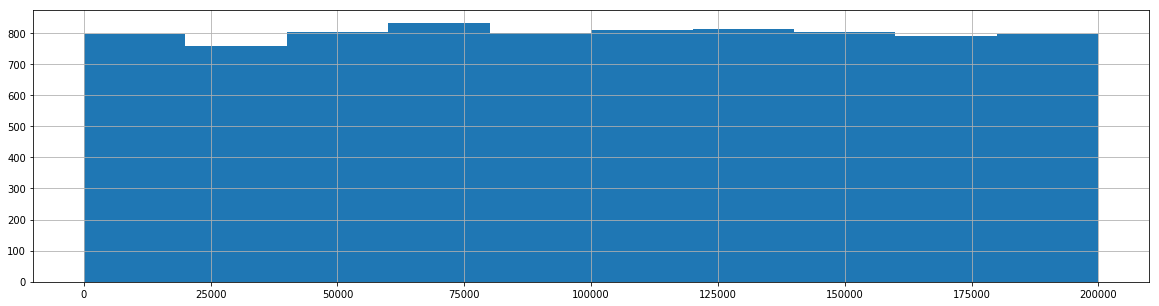

In [160]:
Train['EstimatedSalary'].hist(figsize = [20, 5])

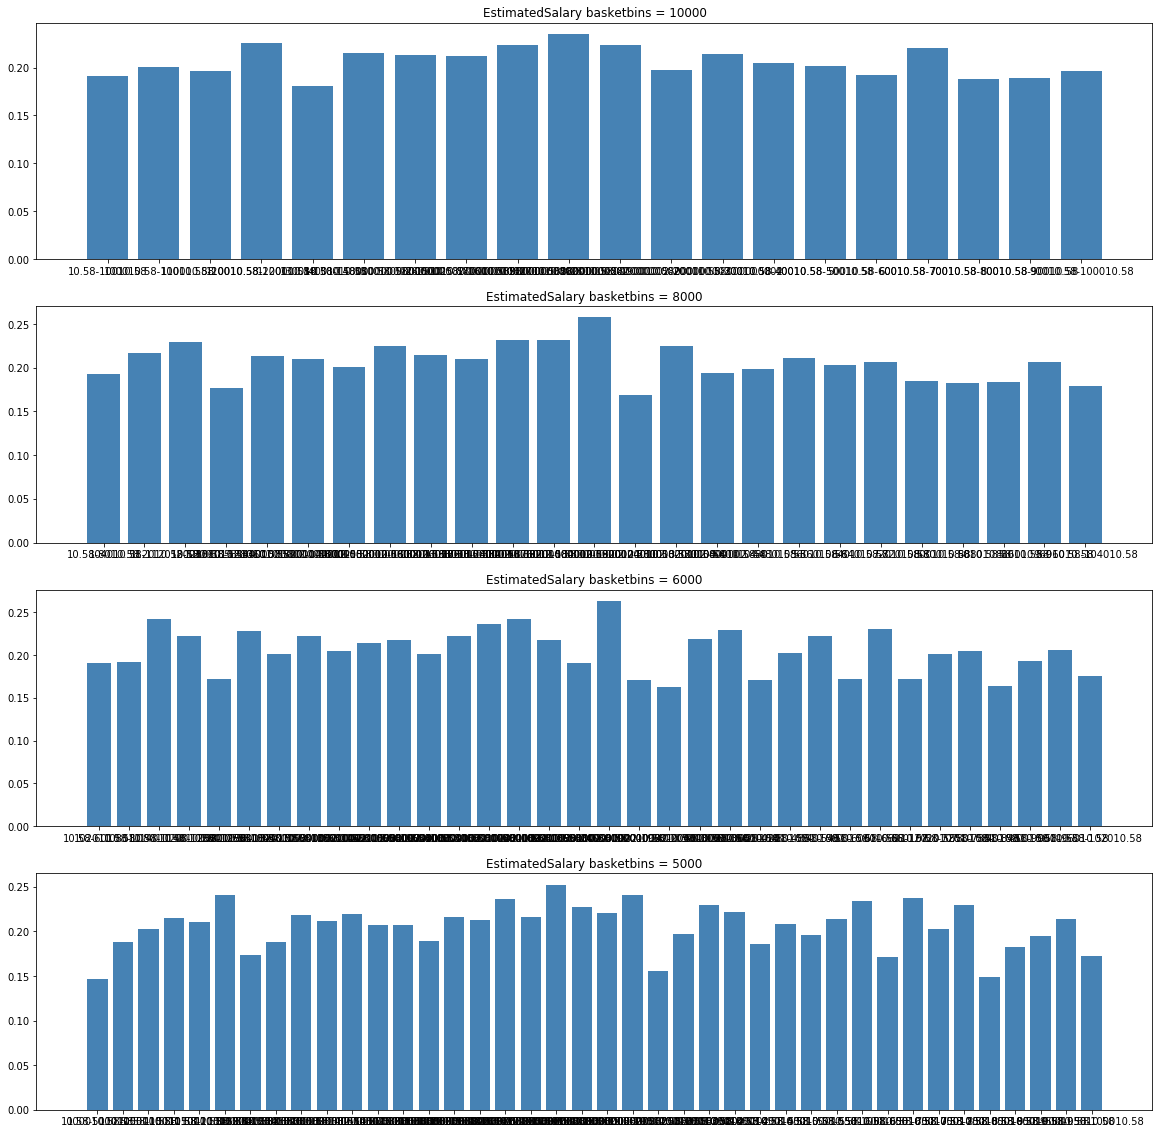

In [164]:
fig, axs = plt.subplots(4, 1, figsize = [20, 20])
Plot_Basket_Probability(Train, 'EstimatedSalary', 10000, axs[0], 'steelblue')
Plot_Basket_Probability(Train, 'EstimatedSalary', 8000, axs[1], 'steelblue')
Plot_Basket_Probability(Train, 'EstimatedSalary', 6000, axs[2], 'steelblue')
Plot_Basket_Probability(Train, 'EstimatedSalary', 5000, axs[3], 'steelblue')

- There is not a significant proof to show that customers with different range of estimated salary have different probability to churn. 
- In the graph above, we can also note that there is no relation between estimated salary and age, tenure, balance and credit score. 

## Part 3: Data Preparation & Baseline Model

### 3.1 Build Data Transformation Pipeline

In [181]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

In [169]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
class TextToInt(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        dummies = []
        for c in X:
            dummies.append(pd.get_dummies(X[c], prefix= c))
        X_result = pd.concat(dummies, axis = 1)
        return X_result

In [189]:
num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(num_val)),
    ("StandardScaler", StandardScaler(num_val))
])

Text_pipeline = Pipeline([
    ("select_text", DataFrameSelector(cat_val)),
    ("text_encoder", TextToInt())
])
preprocess_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline),
    ("Text_pipeline", Text_pipeline)
])

In [190]:
X_train_1 = preprocess_pipeline.fit_transform(X_train)
Y_train_1 = np.array(Y_train)
X_test_1 = preprocess_pipeline.fit_transform(X_test)
Y_test_1 = np.array(Y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### 3.2 Baseline Model with DummyClassifier

In [178]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

In [191]:
strats = {"uniform":{},
         "stratified":{},
         "constant":{"constant":True},
         "most_frequent":{}}
plt_num = 1
for strat, args in strats.items():
    dmy_clf = DummyClassifier(strategy = strat, **args)
    acc_scores_dmy = cross_val_score(dmy_clf, X_train_1, Y_train_1, cv = 5, scoring = "accuracy")
    print("{s}:Accuracy = {a:.2f}".format(s = strat, a = acc_scores_dmy.mean()))

uniform:Accuracy = 0.50
stratified:Accuracy = 0.68
constant:Accuracy = 0.21
most_frequent:Accuracy = 0.79


### 3.3 Machine Learning Model without Feature Engineering

### 3.3.1 Check basic model reuslt

In [200]:
# Import necessary module
from sklearn import model_selection

# Models that we want to try
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [204]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train_1, Y_train_1, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.81074329 0.81386633 0.7975     0.81175735 0.82238899]
Model accuracy of Logistic Regression is 0.8112511920903096
[0.82386009 0.8376015  0.836875   0.82739212 0.83927455]
Model accuracy of KNN is 0.8330006506350198
[0.85509057 0.84884447 0.845625   0.83864916 0.85428393]
Model accuracy of Random Forest is 0.8484986247553221


### 3.3.2 Find Optimal Hyperparameters - LogisticRegression

In [206]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [263]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.1, 1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train_1, Y_train_1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (0.1, 1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [264]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.8115
Best parameters set:
C:1
penalty:l1


In [265]:
# best model
best_LR_model = Grid_LR.best_estimator_

### 3.3.3 Find Optimal Hyperparameters - KNN

In [266]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[3,5,7,9] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train_1, Y_train_1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [267]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.84275
Best parameters set:
n_neighbors:9


In [268]:
# best model
best_KNN_model = Grid_KNN.best_estimator_

### 3.3.4 Find Optimal Hyperparameters - Random Forest

In [269]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train_1, Y_train_1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [270]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.859625
Best parameters set:
n_estimators:80


In [271]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

### 3.4 Model Evaluation

### 3.4.1 Confusion Matrix

In [218]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.8565
precision is: 0.7191489361702128
recall is: 0.43333333333333335


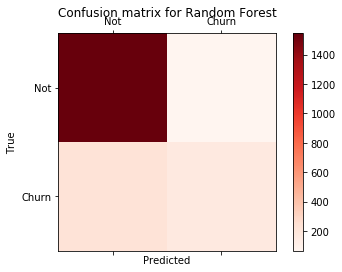

KNN
Accuracy is: 0.844
precision is: 0.6839622641509434
recall is: 0.3717948717948718


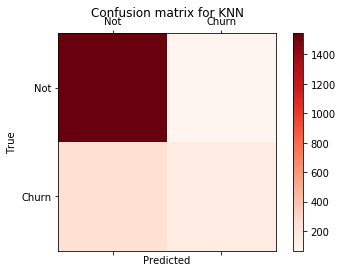

Logistic Regression
Accuracy is: 0.8065
precision is: 0.5086705202312138
recall is: 0.22564102564102564


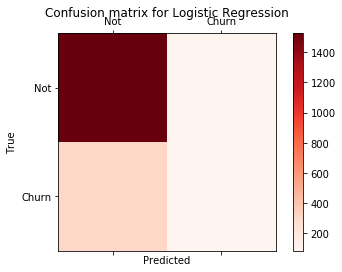

In [219]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(Y_test_1,best_RF_model.predict(X_test_1))),
    ("KNN", confusion_matrix(Y_test_1,best_KNN_model.predict(X_test_1))),
    ("Logistic Regression", confusion_matrix(Y_test_1,best_LR_model.predict(X_test_1))),
]

draw_confusion_matrices(confusion_matrices)

### 3.4.2 ROC & AUC

In [222]:
from sklearn.metrics import roc_curve
from sklearn import metrics

#### Random Forest Model

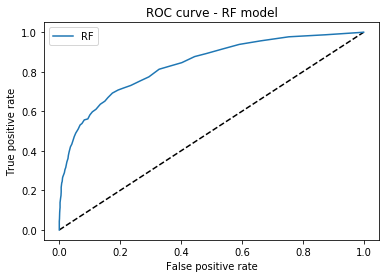

In [223]:
# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test_1)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(Y_test_1, y_pred_rf)

# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [224]:
metrics.auc(fpr_rf,tpr_rf)

0.8354435419652811

#### Logistic Regression Model

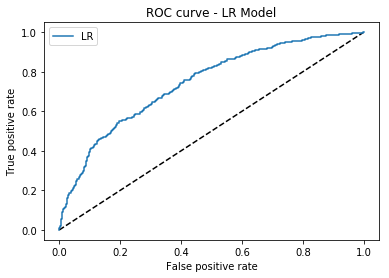

In [226]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test_1)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(Y_test_1, y_pred_lr)

# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [227]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7423713967192228

#### KNN Model

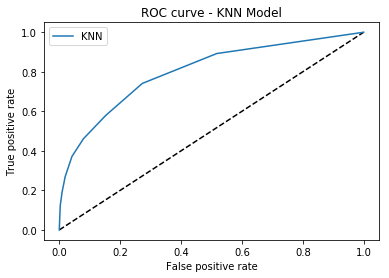

In [229]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_knn = best_KNN_model.predict_proba(X_test_1)[:, 1]
fpr_knn, tpr_knn, thres = roc_curve(Y_test_1, y_pred_knn)

# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [230]:
# AUC score
metrics.auc(fpr_knn,tpr_knn)

0.8001958910654563

### 3.5 Feature Importance

In [231]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_train_1, Y_train_1)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
Geography: 0.2358
Balance: 0.1417
CreditScore: 0.1381
Age: 0.1375
Tenure: 0.1305
Gender: 0.0858
HasCrCard: 0.0255
EstimatedSalary: 0.0098
NumOfProducts: 0.008
IsActiveMember: 0.0072


## Part 4: Feature Engineering

### 4.1 Build Pipeline

In [232]:
def create_pipeline(df, balance = 1):
    # Add Age Square
    df['Age_square'] = df['Age'].apply(lambda x: x*x)
    
    # Add Basket to CreditScore
    def cre_basket(x):
        if x <= 410:
            return 1
        else:
            return 0
    df['CreditScore_basket'] = df['CreditScore'].apply(lambda x: cre_basket(x))
    df = df.drop(['CreditScore'], axis = 1)
    
    # split balance == 0 and balance != 0
    if balance == 1:
        df1 = df[df['Balance'] == 0]
        df1 = df1.drop(['Balance'], axis = 1)
        df2 = df[df['Balance'] != 0]
        return df1, df2
    else:
        return df

In [310]:
X_train_2 = create_pipeline(X_train, balance = 0)
X_test_2 = create_pipeline(X_test, balance = 0)

In [291]:
X_train_2.head()

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_square,CreditScore_basket
0,France,Female,42,2,0.00,1,1,1,101348.88,1764,0
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,1681,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1764,0
3,France,Female,39,1,0.00,2,0,0,93826.63,1521,0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,1849,0


In [307]:
num_val_2 = ['Age', 'Age_square', 'Tenure', 'Balance','EstimatedSalary']
cat_val_2 = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'CreditScore_basket']

In [311]:
num_pipeline_2 = Pipeline([
    ("select_numeric", DataFrameSelector(num_val_2)),
    ("StandardScaler", StandardScaler(num_val_2))
])

Text_pipeline_2 = Pipeline([
    ("select_text", DataFrameSelector(cat_val_2)),
    ("text_encoder", TextToInt())
])
preprocess_pipeline_2 = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline_2),
    ("Text_pipeline", Text_pipeline_2)
])

In [312]:
X_train_2 = preprocess_pipeline_2.fit_transform(X_train_2)
X_test_2 = preprocess_pipeline_2.fit_transform(X_test_2)

### 4.2 Fit Model and Model Evaluation

In [313]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train_2, Y_train_1, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.85196752 0.86758276 0.8475     0.84990619 0.8630394 ]
Model accuracy of Logistic Regression is 0.8559991744137401
[0.82261087 0.83198001 0.838125   0.82551595 0.83864916]
Model accuracy of KNN is 0.8313761967778113
[0.83822611 0.8507183  0.840625   0.85365854 0.84740463]
Model accuracy of Random Forest is 0.8461265148443416


- It's obvious that the performance of each model get improved if we do not do hyperparameter tuning. Logistic Regression get improved a lot after feature engineering.

### 4.3 Hyperparameter Tuning

### 4.3.1 Find Optimal Hyperparameters - LogisticRegression

In [314]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.1, 1, 5, 10)
}
Grid_LR_2 = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR_2.fit(X_train_2, Y_train_1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (0.1, 1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [315]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR_2)

Best score: 0.856
Best parameters set:
C:1
penalty:l2


In [316]:
# best model
best_LR_model_2 = Grid_LR_2.best_estimator_

### 4.3.2 Find Optimal Hyperparameters - KNN

In [317]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[3,5,7,9] 
}
Grid_KNN_2 = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN_2.fit(X_train_2, Y_train_1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [318]:
# best k
print_grid_search_metrics(Grid_KNN_2)

Best score: 0.836375
Best parameters set:
n_neighbors:7


In [319]:
# best model
best_KNN_model_2 = Grid_KNN_2.best_estimator_

### 4.3.3 Find Optimal Hyperparameters - Random Forest

In [320]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF_2 = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF_2.fit(X_train_2, Y_train_1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [321]:
# best number of trees
print_grid_search_metrics(Grid_RF_2)

Best score: 0.853875
Best parameters set:
n_estimators:80


In [322]:
# best random forest
best_RF_model_2 = Grid_RF_2.best_estimator_

### 4.4 Model Evaluation

### 4.4.1 Confusion Matrix

Random Forest
Accuracy is: 0.8605
precision is: 0.7142857142857143
recall is: 0.47435897435897434


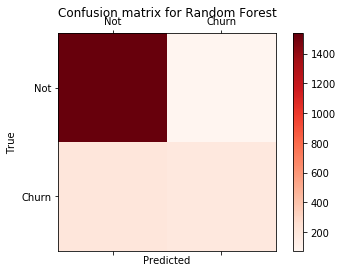

KNN
Accuracy is: 0.83
precision is: 0.6068376068376068
recall is: 0.3641025641025641


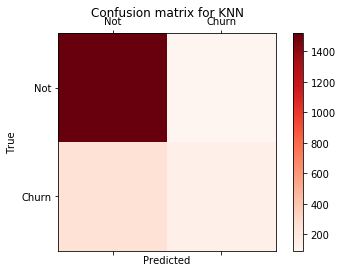

Logistic Regression
Accuracy is: 0.85
precision is: 0.7102803738317757
recall is: 0.38974358974358975


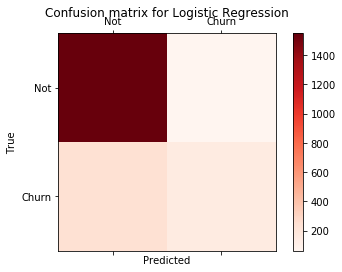

In [323]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(Y_test_1,best_RF_model_2.predict(X_test_2))),
    ("KNN", confusion_matrix(Y_test_1,best_KNN_model_2.predict(X_test_2))),
    ("Logistic Regression", confusion_matrix(Y_test_1,best_LR_model_2.predict(X_test_2))),
]

draw_confusion_matrices(confusion_matrices)

### 4.4.2 ROC & AUC

- The red line in the ROC curve represents the result of the model after feature engineering

### Random Forest

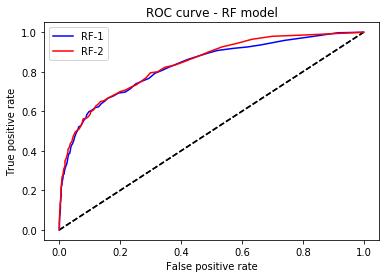

In [343]:
y_pred_rf = best_RF_model.predict_proba(X_test_1)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(Y_test_1, y_pred_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF-1',color = 'b')

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model_2.predict_proba(X_test_2)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(Y_test_1, y_pred_rf)

# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF-2', color = 'r')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

### KNN

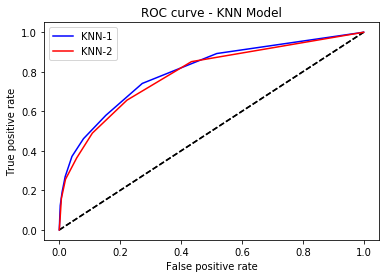

In [344]:
y_pred_knn = best_KNN_model.predict_proba(X_test_1)[:, 1]
fpr_knn, tpr_knn, thres = roc_curve(Y_test_1, y_pred_knn)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN-1', color = 'b')

# Use predict_proba to get the probability results of Logistic Regression
y_pred_knn = best_KNN_model_2.predict_proba(X_test_2)[:, 1]
fpr_knn, tpr_knn, thres = roc_curve(Y_test_1, y_pred_knn)

# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN-2', color = 'r')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

### Logistic Regression

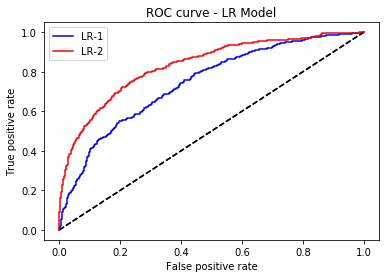

In [345]:
y_pred_lr = best_LR_model.predict_proba(X_test_1)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(Y_test_1, y_pred_lr)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR-1', color = 'b')

# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model_2.predict_proba(X_test_2)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(Y_test_1, y_pred_lr)

# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR-2', color = 'r')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

- We can note that Logistic Regression get a much better performance after feature engineering. This may because Age square describe a quadratic relation between Age and probability of churn. There is also significant difference between two groups of Credit Score. Therefore, Logistic Regression can get such a progress. 

- The next thing we need to test is that whether we separate data when Balance == 0 and Balance != 0 can improve the model. Because we proved above that balance == 0 is a missing value and it's noise. 

### 4.5 Where did we make mistake?
- According to the EDA above, we did several feature engineering in order to improve our model performance. We are glad to see Logistic Regression model get significant progress which is easy to make sense. KNN had a lower performance because we add age square which will enlarge the distance between each point and make data more noisy. We turn Credit Score into 0 and 1 may lose some information. Random Forest get slightly improved.
- But we did not deal with the variable 'Balance'. Therefore, in order to see whether this variable can affect the model significatly, I will seperate the result and to see the differences of metrics between two groups.

In [341]:
### Get balance == 0 index
index_b0_test = list(np.array(X_test[X_test['Balance'] == 0].index) - 8000)
print("The number of Balance == 0 in Test set is: ", len(index_b0_test))

The number of Balance == 0 in Test set is:  737


In [352]:
def Check_Balance_Effect(model_pre, y_true, b0_index, classifier):
    # Define a function to check the where there is difference of metrics between balance == 0 and balance != 0
    # model_pre: An array, the prediction of model
    # y_true: An array, true value of y
    # b0_index: A list, the index list of sample with balance == 0
    # classifier: A string, name of the classifier
    # Return: None
    b0_pre = model_pre[b0_index]
    b0_true = y_true[b0_index]
    b1_pre = [model_pre[i] for i in range(len(model_pre)) if (i not in b0_index)]
    b1_true = [y_true[i] for i in range(len(y_true)) if (i not in b0_index)]
    
    cm_b0 = confusion_matrix(b0_true, b0_pre)
    cm_b1 = confusion_matrix(b1_true, b1_pre)
    
    print('Metrics For Dataset with Balance == 0')
    cal_evaluation(classifier, cm_b0)
    print('Metrics For Dataset with Balance != 0')
    cal_evaluation(classifier, cm_b1)

In [353]:
Check_Balance_Effect(best_RF_model_2.predict(X_test_2), Y_test_1, index_b0_test, 'Random Forest')

Metrics For Dataset with Balance == 0
Random Forest
Accuracy is: 0.9050203527815468
precision is: 0.6486486486486487
recall is: 0.5217391304347826
Metrics For Dataset with Balance != 0
Random Forest
Accuracy is: 0.8345209817893904
precision is: 0.7405405405405405
recall is: 0.4597315436241611


In [354]:
Check_Balance_Effect(best_KNN_model_2.predict(X_test_2), Y_test_1, index_b0_test, 'KNN')

Metrics For Dataset with Balance == 0
KNN
Accuracy is: 0.8887381275440976
precision is: 0.5925925925925926
recall is: 0.34782608695652173
Metrics For Dataset with Balance != 0
KNN
Accuracy is: 0.7957244655581948
precision is: 0.6111111111111112
recall is: 0.3691275167785235


In [355]:
Check_Balance_Effect(best_LR_model_2.predict(X_test_2), Y_test_1, index_b0_test, 'Logistic Regression')

Metrics For Dataset with Balance == 0
Logistic Regression
Accuracy is: 0.9050203527815468
precision is: 0.75
recall is: 0.358695652173913
Metrics For Dataset with Balance != 0
Logistic Regression
Accuracy is: 0.8178939034045922
precision is: 0.7
recall is: 0.39932885906040266


- So, we can find out that when balance == 0, the accuracy is above the case balance != 0 under each model while precision amnd recall are more likely to be lower than the case balance != 0. According to the EDA we did above, we found out that wealthy people are more likely to churn which means people in the case balance == 0 are more likely to be predicted as not churn. However, we know that in the training set, most of people don't churn. That's why when balance == 0, our model have a much better accuracy but relatively low precision and recall.
- After noticing this, I need to separate the data with balance == 0 and balance != 0 and to see whether this can improve our model.

## Part 5: Separate Dataset

### 5.1 Rebuild Train_test_split

In [327]:
def train_test_split_new(df, y_name, test_size):
    # Define a function to split train set and test set, we do not shuffle here. We also separate dataset by whether balance == 0
    # df: the whole dataset, include y
    # y_name: the column name of y
    # test_size: test_size is a number between 0 and 1, which means how much porpotion of data will be test set
    # Return: X_train_b0, X_train_b1, X_test_b0, X_test_b1, Y_train_b0, Y_train_b1, Y_test_b0, Y_test_b1
    split_index = int(df.shape[0]*(1-test_size))
    Train, Test = df.iloc[:split_index, :], df.iloc[split_index:, :]
    # Separate Dataset
    Train_b0 = Train[Train['Balance'] == 0]
    Train_b1 = Train[Train['Balance'] != 0]
    Test_b0 = Test[Test['Balance'] == 0]
    Test_b1 = Test[Test['Balance'] != 0]
    return Train_b0.drop(['Exited'], axis = 1), Train_b1.drop(['Exited'], axis = 1), Test_b0.drop(['Exited'], axis = 1), Test_b1.drop(['Exited'], axis = 1), Train_b0['Exited'], Train_b1['Exited'], Test_b0['Exited'], Test_b1['Exited']

In [328]:
X_train_b0, X_train_b1, X_test_b0, X_test_b1, Y_train_b0, Y_train_b1, Y_test_b0, Y_test_b1 = train_test_split_new(data, 'Exited', 0.2)

In [331]:
# For dataset with Balance != 0
X_train_b1 = preprocess_pipeline_2.fit_transform(create_pipeline(X_train_b1, balance = 0))
X_test_b1 = preprocess_pipeline_2.fit_transform(create_pipeline(X_test_b1, balance = 0))
Y_train_b1 = np.array(Y_train_b1)
Y_test_b1 = np.array(Y_test_b1)

In [332]:
num_val_3 = ['Age', 'Age_square', 'Tenure','EstimatedSalary']
cat_val_3 = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'CreditScore_basket']
num_pipeline_3 = Pipeline([
    ("select_numeric", DataFrameSelector(num_val_3)),
    ("StandardScaler", StandardScaler(num_val_3))
])

Text_pipeline_3 = Pipeline([
    ("select_text", DataFrameSelector(cat_val_3)),
    ("text_encoder", TextToInt())
])
preprocess_pipeline_3 = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline_3),
    ("Text_pipeline", Text_pipeline_3)
])

In [334]:
# For dataset with Balance == 0
X_train_b0 = preprocess_pipeline_3.fit_transform(create_pipeline(X_train_b0, balance = 0))
X_test_b0 = preprocess_pipeline_3.fit_transform(create_pipeline(X_test_b0, balance = 0))
Y_train_b0 = np.array(Y_train_b0)
Y_test_b0 = np.array(Y_test_b0)

### 5.2 Create Model Separately

### 5.2.1 LR Model

In [356]:
# For data with balance == 0
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.1, 1, 5, 10)
}
Grid_LR_b0 = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR_b0.fit(X_train_b0, Y_train_b0)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (0.1, 1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [357]:
print_grid_search_metrics(Grid_LR_b0)

Best score: 0.9038194444444444
Best parameters set:
C:5
penalty:l1


In [358]:
best_LR_model_b0 = Grid_LR_b0.best_estimator_

In [366]:
# For data with balance != 0
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.1, 1, 5, 10)
}
Grid_LR_b1 = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR_b1.fit(X_train_b1, Y_train_b1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (0.1, 1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [367]:
print_grid_search_metrics(Grid_LR_b1)

Best score: 0.827734375
Best parameters set:
C:1
penalty:l1


In [368]:
best_LR_model_b1 = Grid_LR_b1.best_estimator_

### 5.2.2 KNN

In [359]:
# For data with balance == 0
parameters = {
    'n_neighbors':[3,5,7,9] 
}
Grid_KNN_b0 = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN_b0.fit(X_train_b0, Y_train_b0)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [361]:
print_grid_search_metrics(Grid_KNN_b0)

Best score: 0.8861111111111111
Best parameters set:
n_neighbors:7


In [362]:
best_KNN_model_b0 = Grid_KNN_b0.best_estimator_

In [369]:
# For data with balance != 0
parameters = {
    'n_neighbors':[3,5,7,9] 
}
Grid_KNN_b1 = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN_b1.fit(X_train_b1, Y_train_b1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [370]:
print_grid_search_metrics(Grid_KNN_b1)

Best score: 0.8134765625
Best parameters set:
n_neighbors:7


In [372]:
best_KNN_model_b1 = Grid_KNN_b1.best_estimator_

### 5.2.3 Random Forest Model

In [363]:
# For data with balance == 0
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF_b0 = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF_b0.fit(X_train_b0, Y_train_b0)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [364]:
print_grid_search_metrics(Grid_RF_b0)

Best score: 0.9017361111111111
Best parameters set:
n_estimators:80


In [365]:
best_RF_model_b0 = Grid_RF_b0.best_estimator_

In [373]:
# For data with balance != 0
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF_b1 = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF_b1.fit(X_train_b1, Y_train_b1)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [374]:
print_grid_search_metrics(Grid_RF_b1)

Best score: 0.8310546875
Best parameters set:
n_estimators:80


In [379]:
best_RF_model_b1 = Grid_RF_b1.best_estimator_

### 5.3 Combine Result and Model Evaluation

In [376]:
LR_pred = np.concatenate((best_LR_model_b0.predict(X_test_b0), best_LR_model_b1.predict(X_test_b1)))
y_true_new = np.concatenate((Y_test_b0, Y_test_b1))
cal_evaluation('Logistic Regression', confusion_matrix(y_true_new, LR_pred))

Logistic Regression
Accuracy is: 0.8505
precision is: 0.7004405286343612
recall is: 0.4076923076923077


In [377]:
KNN_pred = np.concatenate((best_KNN_model_b0.predict(X_test_b0), best_KNN_model_b1.predict(X_test_b1)))
y_true_new = np.concatenate((Y_test_b0, Y_test_b1))
cal_evaluation('KNN', confusion_matrix(y_true_new, KNN_pred))

KNN
Accuracy is: 0.8435
precision is: 0.6711111111111111
recall is: 0.3871794871794872


In [380]:
RF_pred = np.concatenate((best_RF_model_b0.predict(X_test_b0), best_RF_model_b1.predict(X_test_b1)))
y_true_new = np.concatenate((Y_test_b0, Y_test_b1))
cal_evaluation('Random Forest', confusion_matrix(y_true_new, RF_pred))

Random Forest
Accuracy is: 0.857
precision is: 0.7063492063492064
recall is: 0.4564102564102564


- Based on test set, we can find out that for LR model, accuracy and precision are almost the same as before, but recall get improved. For KNN model, all metrics improved. For Random Forest model, all metrics are lower than before. Details will be discussed in conclusion part.